In [323]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the File 

In [324]:
df = pd.read_csv(r'E:\Downloads\ML_Restaurants_Success_Predictor-main\ML_Restaurants_Success_Predictor-main\zomato.csv')
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


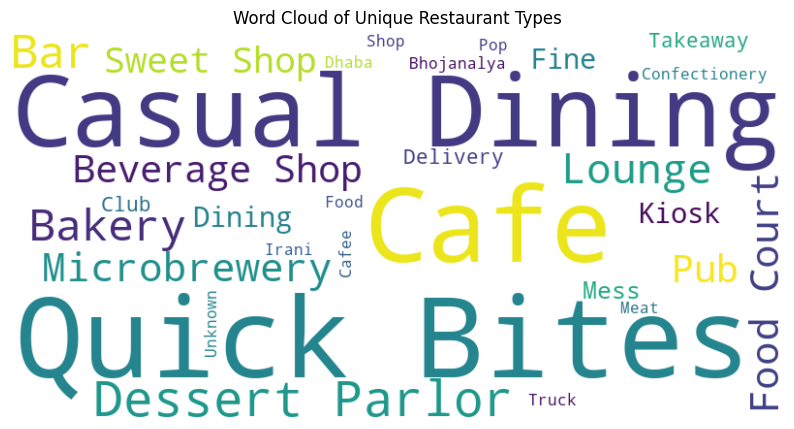

In [325]:
import pandas as pd
from wordcloud import WordCloud


# Assuming your dataset has a column named 'rest_type'
# Convert to string and handle NaN values
restaurant_types = df['rest_type'].astype(str).replace('nan', 'Unknown').unique()

# Concatenate all unique restaurant types into a single string
text = ' '.join(restaurant_types)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotting the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Unique Restaurant Types')
plt.savefig('types.png')
plt.show()


## Dropping Duplicates

In [326]:
df.drop_duplicates(inplace=True)
df.shape

(51717, 17)

In [327]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Preparing Approx Cost Numerical Feature

In [329]:
# before transformation
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [330]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))

In [331]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [332]:
uv=df['approx_cost(for two people)'].unique()
print(uv)

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  900.  200.  750.
  150.  850.  100. 1200.  350.  250.  950. 1000. 1500. 1300.  199.   80.
 1100.  160. 1600.  230.  130.   50.  190. 1700.   nan 1400.  180. 1350.
 2200. 2000. 1800. 1900.  330. 2500. 2100. 3000. 2800. 3400.   40. 1250.
 3500. 4000. 2400. 2600.  120. 1450.  469.   70. 3200.   60.  560.  240.
  360. 6000. 1050. 2300. 4100. 5000. 3700. 1650. 2700. 4500.  140.]


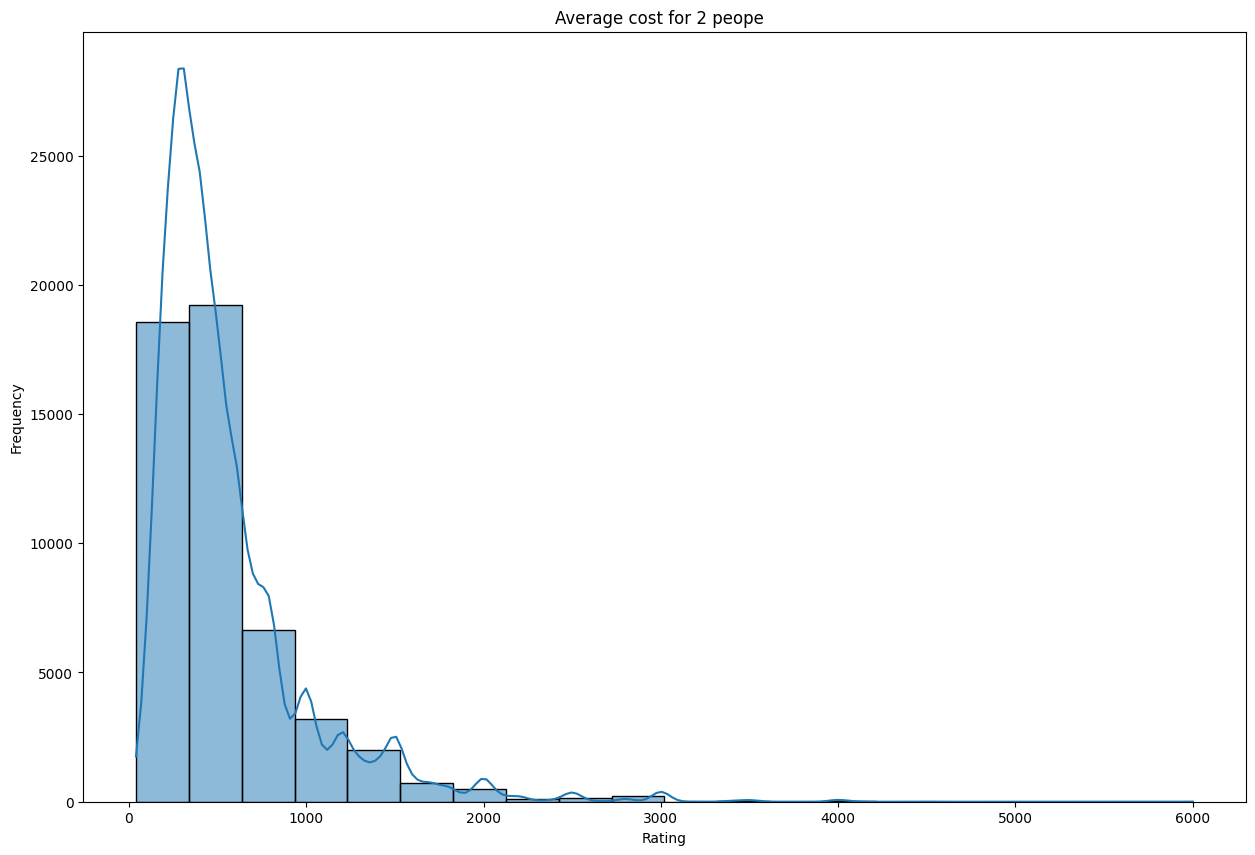

<Figure size 640x480 with 0 Axes>

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rate' is the column containing restaurant ratings
plt.figure(figsize=(15, 10))
sns.histplot(df['approx_cost(for two people)'].dropna().astype(float), bins=20, kde=True)
plt.title('Average cost for 2 peope  ')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
plt.savefig('cost2.png')

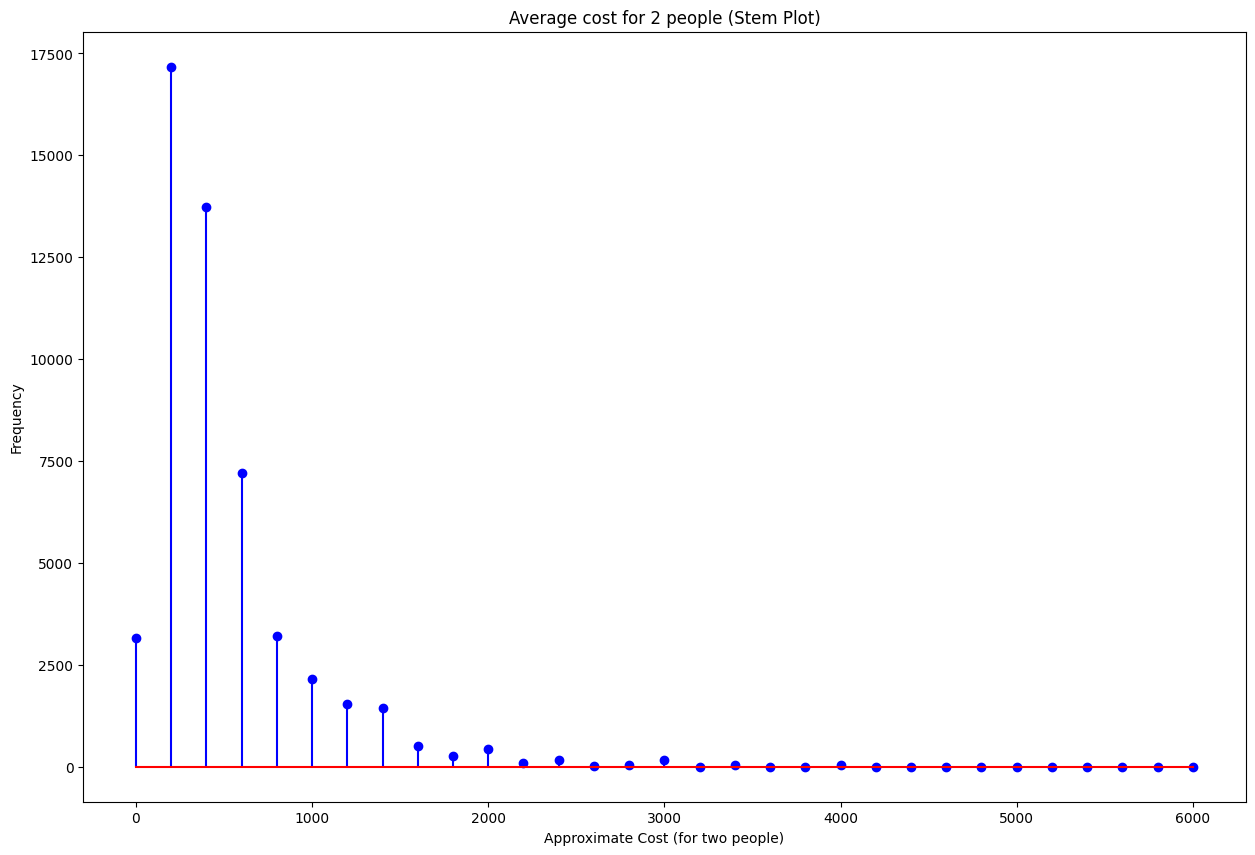

In [334]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame

# Ensure that the 'approx_cost(for two people)' column contains string values
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)

# Clean and convert 'approx_cost(for two people)' to numeric values
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Determine the range of your data and set bins accordingly
data_range = int(df['approx_cost(for two people)'].max() // 200) * 200 + 200  # Round up to the nearest 200
bins = range(0, data_range + 200, 200)

# Compute histogram using np.histogram
hist, bin_edges = np.histogram(df['approx_cost(for two people)'].dropna().astype(float), bins=bins)

# Create a stem plot
plt.figure(figsize=(15, 10))
plt.stem(bin_edges[:-1], hist, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Average cost for 2 people (Stem Plot)')
plt.xlabel('Approximate Cost (for two people)')
plt.ylabel('Frequency')

# Save the figure before displaying
plt.savefig('cost2_stem.png')

# Display the plot
plt.show()


### Preparing Rate Numerical Feature

In [335]:
# before tranformation
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [336]:
def split(x):
    return x.split('/')[0]

In [337]:
df['rate']=df['rate'].astype(str).apply(split)

In [338]:
df['rate'].replace('NEW',0,inplace=True)
df['rate'].replace('-',0,inplace=True)

In [339]:
df['rate']=df['rate'].astype(str).astype(float)

In [340]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [341]:
df['rate'].isnull().sum()

7775

In [342]:
# few more tranformations
def mark(x):
    if x in ('Quick Bites', 'Casual Dining'):
        return 'Quick Bites + Casual Dining'
    else:
        return 'other'

In [343]:
df['Top_types']=df['rest_type'].apply(mark)

### Creating New Restaurants and Training data

In [344]:
def assign(x):
    if x>0:
        return 1
    else:
        return 0
df['rated']=df['rate'].apply(assign)

In [345]:
df['rated'].unique() # here 0 is new rest and 1 is for training rest

array([1, 0], dtype=int64)

In [346]:
# separating new and training data
new_restaurants = df[df['rated'] == 0]
train_val_restaurants = df.query('rated == 1')

### Threshold for dividing Good and Bad Rest

In [347]:
threshold = 3.75 #any restaurant with rating greater than 3.75 would have target value as 1
train_val_restaurants['target'] = train_val_restaurants['rate'].apply(lambda x: 1 if x >= threshold else 0)

C:\Users\melro\AppData\Local\Temp\ipykernel_3216\1460972383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_val_restaurants['target'] = train_val_restaurants['rate'].apply(lambda x: 1 if x >= threshold else 0)


### Feature Extraction

In [348]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target'],
      dtype='object')

In [349]:
def count(x):
    return len(x.split(','))

In [350]:
#### as it have some NAN value that why very first I have to convert into str  &  then apply a function
train_val_restaurants['total_cuisines']=train_val_restaurants['cuisines'].astype(str).apply(count)
train_val_restaurants['multiple_types']=train_val_restaurants['rest_type'].astype(str).apply(count)

C:\Users\melro\AppData\Local\Temp\ipykernel_3216\867460467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_val_restaurants['total_cuisines']=train_val_restaurants['cuisines'].astype(str).apply(count)
C:\Users\melro\AppData\Local\Temp\ipykernel_3216\867460467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_val_restaurants['multiple_types']=train_val_restaurants['rest_type'].astype(str).apply(count)


In [351]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target',
       'total_cuisines', 'multiple_types'],
      dtype='object')

In [352]:
# some important features we would be intrested in
imp_features=['online_order','book_table','location','rest_type','multiple_types','total_cuisines','listed_in(type)','approx_cost(for two people)','target']

In [353]:
data = train_val_restaurants[imp_features]

In [354]:
data.isnull().sum() # as Null data is less than 1-2% we can drop it 

online_order                     0
book_table                       0
location                         0
rest_type                      149
multiple_types                   0
total_cuisines                   0
listed_in(type)                  0
approx_cost(for two people)    247
target                           0
dtype: int64

In [355]:
data.dropna(how='any',inplace=True)

C:\Users\melro\AppData\Local\Temp\ipykernel_3216\3923625894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='any',inplace=True)


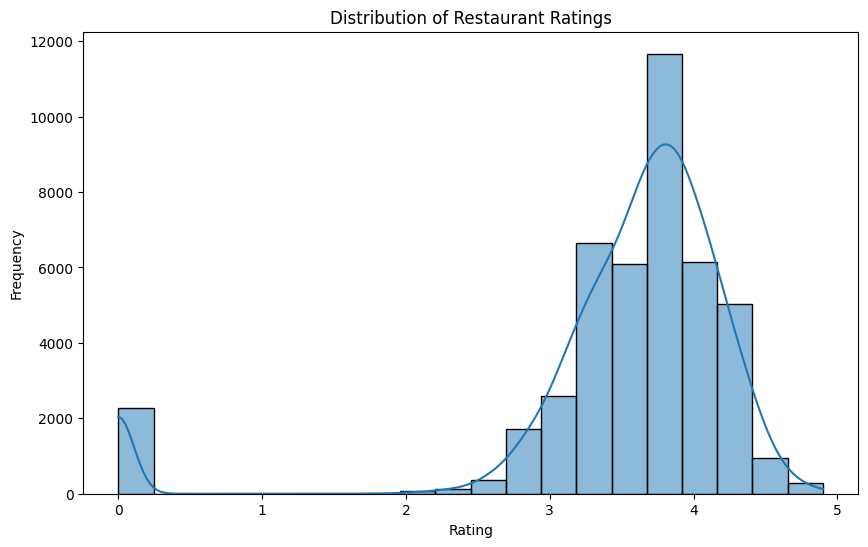

<Figure size 640x480 with 0 Axes>

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rate' is the column containing restaurant ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'].dropna().astype(float), bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
plt.savefig('rating.png')


### Splitting data into Categorical and Numerical based upon type of data

In [357]:
# Splitting features by data type, any data which is object is a categorical data
cat_features= [col for col in data.columns if data[col].dtype == 'O']
num_features= [col for col in data.columns if data[col].dtype != 'O']

In [358]:
cat_features

['online_order', 'book_table', 'location', 'rest_type', 'listed_in(type)']

In [359]:
# unique features in categorical data
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features


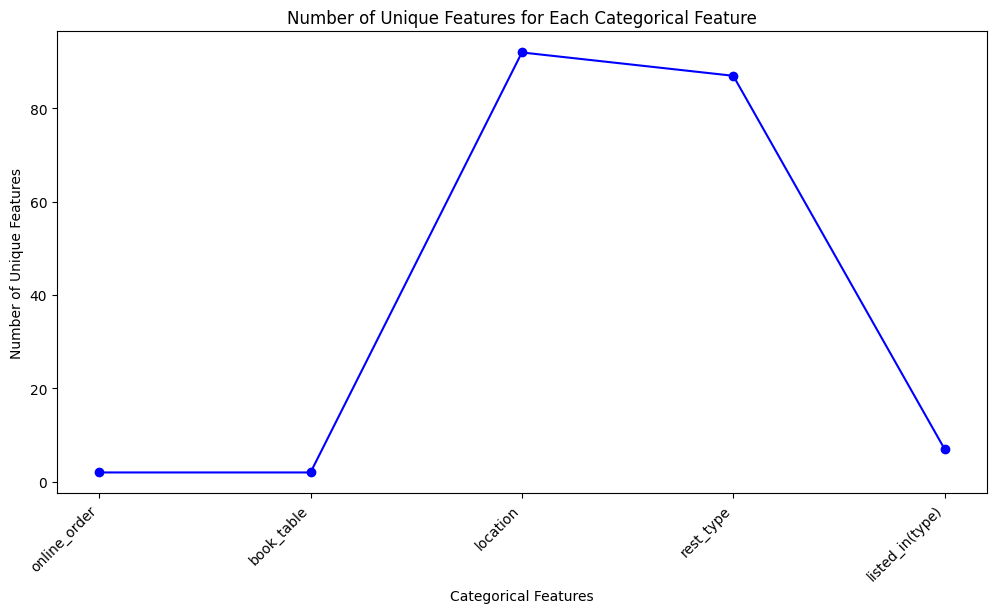

In [360]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'cat_features' is a list of categorical feature column names
cat_features = ['online_order', 'book_table', 'location', 'rest_type', 'listed_in(type)']

# Create lists to store feature names and their corresponding unique feature counts
feature_names = []
unique_feature_counts = []

# Iterate over categorical features
for feature in cat_features:
    feature_names.append(feature)
    unique_feature_counts.append(data[feature].nunique())

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(feature_names, unique_feature_counts, marker='o', linestyle='-', color='b')
plt.title('Number of Unique Features for Each Categorical Feature')
plt.xlabel('Categorical Features')
plt.ylabel('Number of Unique Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Save the figure before displaying
plt.savefig('unique_features_line_plot.png')

# Display the plot
plt.show()


In [361]:
#location and rest_type has too manu unique features, lets try to reduce them
cols=['location','rest_type']
for col in cols:
    print('Total feature in {} are {}'.format(col,data[col].nunique()))
    print(data[col].value_counts()/(len(data))*100)
    print('\n')
#we can see BTM is like 9% and Quickbites is like 33 percent, now we can define a threshold and put rest things as
#Other category of data

Total feature in location are 92
location
BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: count, Length: 92, dtype: float64


Total feature in rest_type are 87
rest_type
Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Dessert Parlor, Kiosk          0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: count, Length: 87, dtype: float64




In [362]:
percent=data['location'].value_counts()/len(data)*100
values=percent.values

In [363]:
len(values[values>0.4])

46

In [364]:
#### lets set Threshold value 0.4 
values=data['location'].value_counts()/len(data)*100
values

location
BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: count, Length: 92, dtype: float64

<module 'matplotlib.pyplot' from 'c:\\Users\\melro\\anaconda3\\envs\\myenv2\\Lib\\site-packages\\matplotlib\\pyplot.py'>

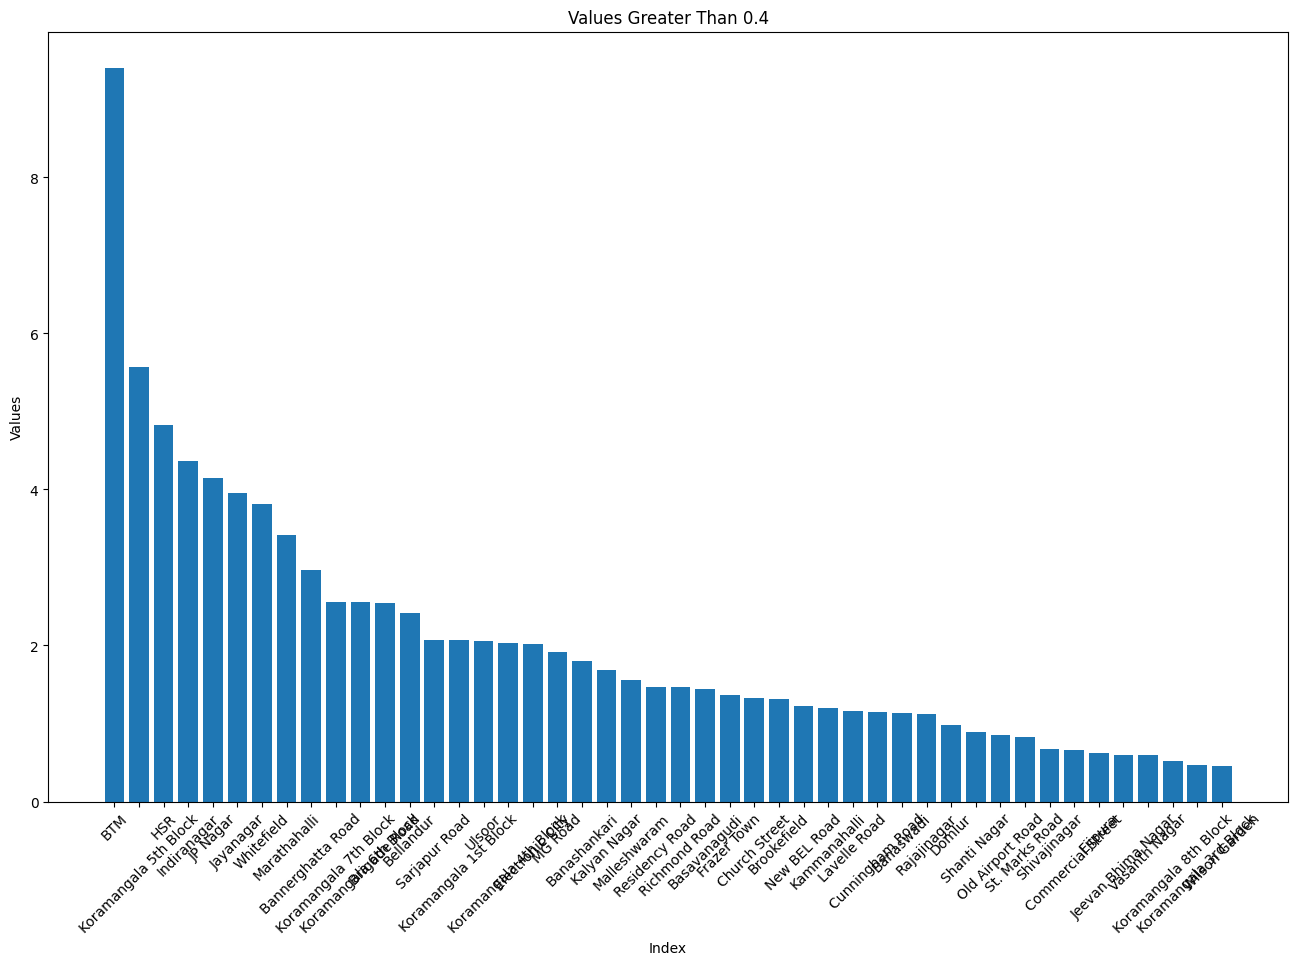

In [365]:
import matplotlib.pyplot as plt
threshold=0.4 #for location
imp=values[values>threshold]
imp

plt.figure(figsize=(16, 10))
# Create a bar plot
plt.bar(imp.index, imp.values)

plt.xticks(rotation=45)
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title(f'Values Greater Than {threshold}')
plt

In [366]:
data['location']=np.where(data['location'].isin(imp.index),data['location'],'other')

C:\Users\melro\AppData\Local\Temp\ipykernel_3216\114142037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['location']=np.where(data['location'].isin(imp.index),data['location'],'other')


In [367]:
data['location'].nunique() #reduced the location features to 47

47

In [368]:
# for rest_type
values2=data['rest_type'].value_counts()/len(data)*100
values2

rest_type
Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Dessert Parlor, Kiosk          0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: count, Length: 87, dtype: float64

In [369]:
#setting threshold as 0.3 to check number of features reduced to
len(values2[values2>0.3])

29

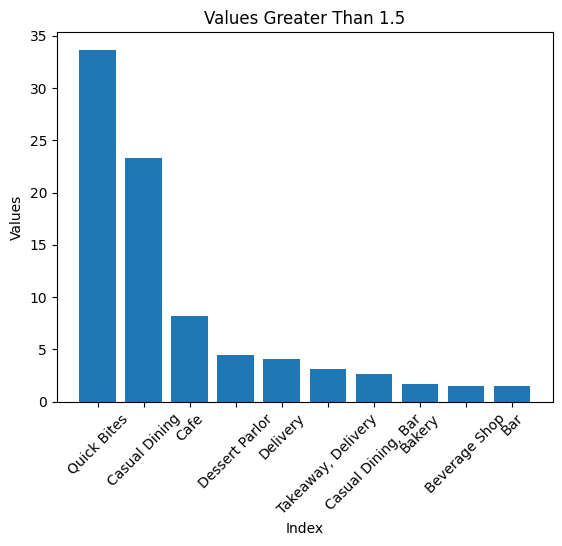

In [370]:
#making it 1.5 to reduce more
threshold=1.5
imp2=values2[values2>1.5]
imp2
plt.bar(imp2.index, imp2.values)
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title(f'Values Greater Than {threshold}')
plt.savefig('box_plot.png')

In [371]:
data['rest_type']=np.where(data['rest_type'].isin(imp2.index),data['rest_type'],'other')

C:\Users\melro\AppData\Local\Temp\ipykernel_3216\1671127400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rest_type']=np.where(data['rest_type'].isin(imp2.index),data['rest_type'],'other')


In [372]:
# lets see how much features we are left with now
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 47 unique features
rest_type has total 11 unique features
listed_in(type) has total 7 unique features


In [373]:
#feature encoding now
data_cat = data[cat_features]
for col in cat_features:
    col_encoded = pd.get_dummies(data_cat[col],prefix=col,drop_first=False)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col, axis=1, inplace=True)

In [374]:
data_cat.head(5)

,online_order_No,online_order_Yes,book_table_No,book_table_Yes,location_BTM,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,...,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",rest_type_other,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,False,True,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,True,True,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,True,True,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
3,True,False,True,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,True,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [375]:
data_cat.drop(['online_order_No','book_table_No'], axis=1, inplace =True)

In [376]:
data_cat.head()

,online_order_Yes,book_table_Yes,location_BTM,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,location_Brigade Road,location_Brookefield,...,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",rest_type_other,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,True,True,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,True,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,False,False,True,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [377]:
#contacting with final data
data_final=pd.concat([data.loc[:,['multiple_types','total_cuisines','approx_cost(for two people)','target']],data_cat],axis=1)
data_final

,multiple_types,total_cuisines,approx_cost(for two people),target,online_order_Yes,book_table_Yes,location_BTM,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,...,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",rest_type_other,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,1,3,800.0,1,True,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1,3,800.0,1,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,3,800.0,1,True,False,False,True,False,False,...,False,False,True,True,False,False,False,False,False,False
3,1,2,300.0,0,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
4,1,2,600.0,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,2,2,800.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
51711,2,4,800.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
51712,1,1,1500.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
51715,1,1,2500.0,1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [378]:
data_final.shape

(41271, 71)

In [379]:
# Splitting the data
X = data_final.drop('target', axis=1)
y = data_final['target'].values
y

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [380]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [381]:
X_train.shape

(33016, 70)

### model for decision tree

In [382]:
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)

In [383]:
# Fit the model to the data.
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=1)

In [384]:
# Make predictions.
predictions = model.predict(X_test)
confusion_matrix(predictions, y_test)

array([[3579, 1271],
       [ 673, 2732]], dtype=int64)

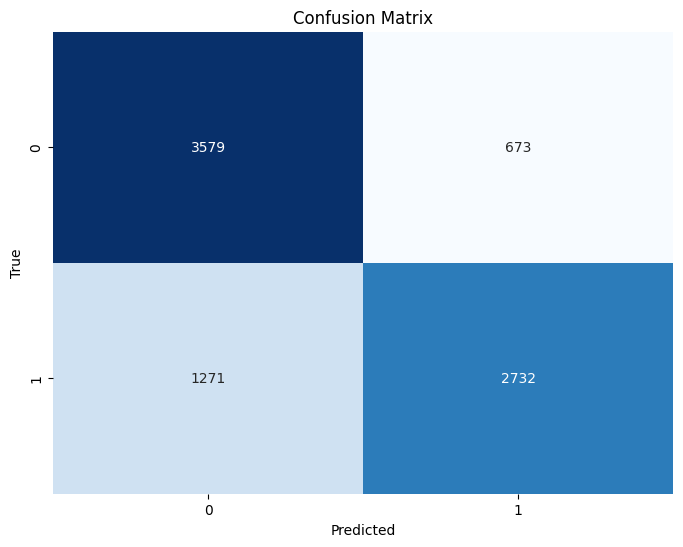

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      4252
           1       0.80      0.68      0.74      4003

    accuracy                           0.76      8255
   macro avg       0.77      0.76      0.76      8255
weighted avg       0.77      0.76      0.76      8255



In [385]:
# Create a confusion matrix
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('matrix.png')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

In [386]:

accuracy_score(predictions,y_test)


0.7645063597819504

linear regression 


In [387]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

c:\Users\melro\anaconda3\envs\myenv2\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision tree classifier

In [388]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)

In [389]:
from sklearn.metrics import accuracy_score, classification_report
print("Logistic Regression classification report: \n\n"  ,classification_report(y_test,y_pred))

Logistic Regression classification report: 

               precision    recall  f1-score   support

           0       0.70      0.82      0.75      4252
           1       0.76      0.62      0.68      4003

    accuracy                           0.72      8255
   macro avg       0.73      0.72      0.72      8255
weighted avg       0.73      0.72      0.72      8255



In [390]:
print("Decision Tree classification report: \n\n"  ,classification_report(y_test,y_pred_dt))

Decision Tree classification report: 

               precision    recall  f1-score   support

           0       0.85      0.91      0.88      4252
           1       0.89      0.83      0.86      4003

    accuracy                           0.87      8255
   macro avg       0.87      0.87      0.87      8255
weighted avg       0.87      0.87      0.87      8255



### Creating and Testing for a Random Data

In [391]:
listOfColumns = X_train.columns.to_list()

In [392]:
# creating for dict for testing
dictForTest = {}
for i in listOfColumns:
    dictForTest[i]=0

In [393]:
dictForTest #lets copy this data for a new data and manipulate accordingly

{'multiple_types': 0,
 'total_cuisines': 0,
 'approx_cost(for two people)': 0,
 'online_order_Yes': 0,
 'book_table_Yes': 0,
 'location_BTM': 0,
 'location_Banashankari': 0,
 'location_Banaswadi': 0,
 'location_Bannerghatta Road': 0,
 'location_Basavanagudi': 0,
 'location_Bellandur': 0,
 'location_Brigade Road': 0,
 'location_Brookefield': 0,
 'location_Church Street': 0,
 'location_Commercial Street': 0,
 'location_Cunningham Road': 0,
 'location_Domlur': 0,
 'location_Ejipura': 0,
 'location_Electronic City': 0,
 'location_Frazer Town': 0,
 'location_HSR': 0,
 'location_Indiranagar': 0,
 'location_JP Nagar': 0,
 'location_Jayanagar': 0,
 'location_Jeevan Bhima Nagar': 0,
 'location_Kalyan Nagar': 0,
 'location_Kammanahalli': 0,
 'location_Koramangala 1st Block': 0,
 'location_Koramangala 3rd Block': 0,
 'location_Koramangala 4th Block': 0,
 'location_Koramangala 5th Block': 0,
 'location_Koramangala 6th Block': 0,
 'location_Koramangala 7th Block': 0,
 'location_Koramangala 8th Bloc

In [394]:
newDictForTest = {'multiple_types': 1,
 'total_cuisines': 3,
 'approx_cost(for two people)': 1500,
 'online_order_Yes': 1,
 'book_table_Yes': 1,
 'location_BTM': 0,
 'location_Banashankari': 0,
 'location_Banaswadi': 0,
 'location_Bannerghatta Road': 0,
 'location_Basavanagudi': 0,
 'location_Bellandur': 0,
 'location_Brigade Road': 0,
 'location_Brookefield': 0,
 'location_Church Street': 0,
 'location_Commercial Street': 0,
 'location_Cunningham Road': 0,
 'location_Domlur': 0,
 'location_Ejipura': 0,
 'location_Electronic City': 1,
 'location_Frazer Town': 0,
 'location_HSR': 0,
 'location_Indiranagar': 0,
 'location_JP Nagar': 0,
 'location_Jayanagar': 0,
 'location_Jeevan Bhima Nagar': 0,
 'location_Kalyan Nagar': 0,
 'location_Kammanahalli': 0,
 'location_Koramangala 1st Block': 0,
 'location_Koramangala 3rd Block': 0,
 'location_Koramangala 4th Block': 0,
 'location_Koramangala 5th Block': 0,
 'location_Koramangala 6th Block': 0,
 'location_Koramangala 7th Block': 0,
 'location_Koramangala 8th Block': 0,
 'location_Lavelle Road': 0,
 'location_MG Road': 0,
 'location_Malleshwaram': 0,
 'location_Marathahalli': 0,
 'location_New BEL Road': 0,
 'location_Old Airport Road': 0,
 'location_Rajajinagar': 0,
 'location_Residency Road': 0,
 'location_Richmond Road': 0,
 'location_Sarjapur Road': 0,
 'location_Shanti Nagar': 0,
 'location_Shivajinagar': 0,
 'location_St. Marks Road': 0,
 'location_Ulsoor': 0,
 'location_Vasanth Nagar': 0,
 'location_Whitefield': 0,
 'location_Wilson Garden': 0,
 'location_other': 0,
 'rest_type_Bakery': 0,
 'rest_type_Bar': 0,
 'rest_type_Beverage Shop': 0,
 'rest_type_Cafe': 0,
 'rest_type_Casual Dining': 0,
 'rest_type_Casual Dining, Bar': 0,
 'rest_type_Delivery': 0,
 'rest_type_Dessert Parlor': 0,
 'rest_type_Quick Bites': 0,
 'rest_type_Takeaway, Delivery': 0,
 'rest_type_other': 0,
 'listed_in(type)_Buffet': 0,
 'listed_in(type)_Cafes': 0,
 'listed_in(type)_Delivery': 0,
 'listed_in(type)_Desserts': 0,
 'listed_in(type)_Dine-out': 0,
 'listed_in(type)_Drinks & nightlife': 0,
 'listed_in(type)_Pubs and bars': 0}

In [395]:
#preparing dataframe for testing 
new = pd.DataFrame(newDictForTest,index=[0])


In [396]:
acc_dict={}




random forest

In [397]:
newPrediction = model.predict(new)
predProb = model.predict_proba(new)
acc_dict["Random forest"] = predProb[0][1]
predProb[0][1]

0.7682857131833768

logistic regression

In [398]:
newPrediction = logreg.predict(new)
predProb1 = logreg.predict_proba(new)
acc_dict["Logistic regression"] = predProb1[0][1]

predProb1[0][1]


0.9627777380433407

In [399]:
newPrediction = dt.predict(new)
predProb2 = dt.predict_proba(new)
acc_dict["Decision tree"] = 0.5
predProb2[0][1]

1.0

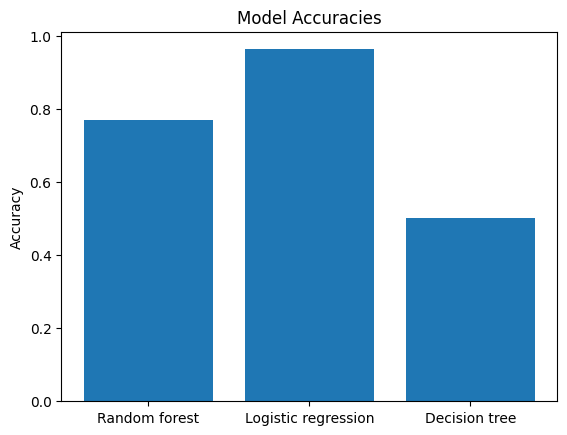

In [400]:
# Plot the accuracies
fig, ax = plt.subplots()
models = list(acc_dict.keys())
accuracies = list(acc_dict.values())

ax.bar(models, accuracies)
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies')
plt.savefig("comparision details")

plt.show()


### Pickle to Load out the model

In [401]:
import pickle
with open('your_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [402]:
import pickle
with open('logreg.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)